# Nonlinearity in Finance

In recent years, there has been a growing interest in research on nonlinear phenomena in economic and financial theory. With nonlinear serial dependence playing a significant role in the returns of many financial time series, this makes security valuation and pricing very important, leading to an increase in studies of nonlinear modeling of financial products.

Practitioners in the financial industry use nonlinear models to forecast volatility, price derivatives, and compute **Value at Risk (VAR)**. Unlike linear models, where linear algebra is used to find a solution, nonlinear models do not necessarily infer a global optimal solution. Numerical root-finding methods are usually employed to converge toward the nearest local optimal solution, which is a root.

In this chapter, we will discuss the following topics to explore some methods that will help us extract information from nonlinear models:

- Examining the definition of nonlinearity
- Discussing the volatility smile in implied volatility modeling
- Discussing Markov switching models, threshold models, and smooth transition models as nonlinear models
- An overview of root-finding to find the optimal point of nonlinear models
- Examining the incremental search algorithm, bisection algorithm, Newton's algorithm, and secant method in root-finding
- Combining root-finding methods with Brent's method
- SciPy's implementation of root-finding methods as scalar functions
- SciPy's general nonlinear solvers in root-finding

### Nonlinearity modeling

While linear relationships aim to explain observed phenomena in the simplest way possible, many complex physical phenomena cannot be explained using such models. A nonlinear relationship is defined as follows:

$$f(a + b) \neq f(a) + f(b)$$

Even though nonlinear relationships may be complex, to fully understand and model them we will take a look at the examples that are applied in the context of finance and in time series models.

### Examples of nonlinear models

Many nonlinear models have been proposed for academic and applied research to explain certain aspects of economic and financial data that are left unexplained by linear models. The literature on nonlinearity in finance is simply too broad and deep to be adequately explained in this book. In this section, we will just briefly discuss some examples of nonlinear models that we may possibly come across for practical uses: the implied volatility model, Markov-switching model, threshold model, and smooth transition model.

### The implied volatility model

Perhaps one of the most widely studied option pricing models is the Black-Scholes-Merton model, or simply the Black-Scholes model in short. A call (put) option is a right, not an obligation, to buy (sell) the underlying security at a particular price and at a particular time. The Black-Scholes model helps determine the fair price of an option with the assumption that returns of the underlying security are normally distributed $(N(.))$ or that asset prices are log-normally distributed.

The formula takes on the following assumed variables: the strike price $(K)$, time to expiry $(T)$, risk-free rate $(r)$, volatility of the underlying returns $(\sigma)$, current price of the underlying asset $(S)$, and its yield $(q)$. The mathematical formula for a call option $C(S,t)$ is represented as follows:

$$C(S,t) = Se^{-qT}N(d_1) - Ke^{-rT}N(d_2)$$

Here:

$$d_1 = \frac{ln(S / K) + (r - q + \sigma^2 / 2)T}{\sigma\sqrt T}$$

$$d_2 = d_1 - \sigma\sqrt T$$

By way of market forces, the price of an option may deviate from the price derived from the Black-Scholes formula. In particular, the realized volatility (that is, the observed volatility of the underlying returns from historical market prices) could differ from the volatility value as implied by the Black-Scholes model, which is indicated by $\sigma$.

Remember the CAPM model discussed in *Chapter 2, The Importance of Linearity in Finance*. In general, securities that have higher returns exhibit higher risk, as indicated by the volatility or standard deviation of returns.

With volatility being such an important factor in security pricing, many volatility models have been proposed for studies. One such model is the implied volatility modeling of option prices.

Suppose we plot the implied volatility values of an equity option given by the Black-Scholes formula with a particular maturity for every strike price available. In general, we get a curve commonly known as the *volatility smile* due to its shape:

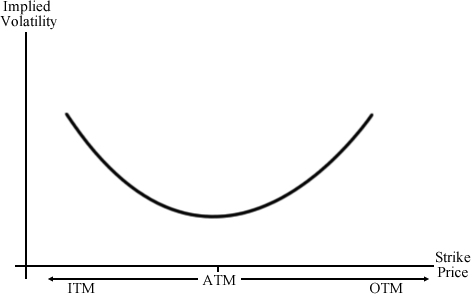

The implied volatility typically is its highest for deep **in-the-money (ITM)** and **out-of-the-money (OTM)** options driven by heavy speculation and at its lowest for **at-the-money (ATM)** options.

The characteristics of options are explained as follows:
- In-the-money options (ITM): A call option is considered ITM when its strike price is below the market price of the underlying asset. A put option is considered ITM when its strike price is above the market price of the underlying asset. ITM options have an intrinsic value when exercised.
- Out-of-the-money options (OTM): A call option is considered OTM when its strike price is above the market price of the underlying asset. A put option is considered OTM when its strike price is below the market price of the underlying asset. OTM options have no intrinsic value when exercised.
- At-the-money options (ATM): An option is considered ATM when its strike price is the same as the market price of the underlying asset. ATM options have no intrinsic value, but may still have time value.

From the preceding volatility curve, one of the objectives in implied volatility modeling is to seek the lowest implied volatility value possible or, in other words, to "find the root". When found, the theoretical price of an ATM option for a particular maturity can be deduced and compared against the market prices for potential opportunities, such as for studying near ATM options or far OTM options. However, since the curve is nonlinear, linear algebra cannot adequately solve for the root. We will take a look at a number of root-finding methods in the later sections of this chapter.

### The Markov regime-switching model

To model nonlinear behavior in economic and financial time series, Markov switching models can be used to characterize time series in different states of the world or regimes. Examples of such states could be a *volatile* state as seen in the 2008 global economic downturn, or a *growth* state of a steadily recovering economy. The ability to transit between these structures lets the model capture complex dynamic patterns.

The Markov property of stock prices implies that only the present values are relevant for predicting the future. Past stock price movements are irrelevant to the way the present has emerged.

Let's take an example of a Markov regime-switching model with $m = 2$ regimes:

$$y_t = \Bigg\{ \begin{align*} x_1 + \varepsilon_t, when \ s_t = 1\\ x_2 + \varepsilon_t, when \ s_t = 2 \end{align*}$$

$\varepsilon_t$ is an **independent and identically distributed (i.i.d)** white noise. White noise is a normally distributed random process with a mean of zero. The same model can be represented with dummy variables:

$$y_t = x_1D_t + x_2(1 - D_t) + \varepsilon_t$$

$$where \ D_t = 1, when \ s_t = 1$$

$$or \ D_t = 0, when \ S_t = 2$$

The application of Markov switching models includes representing the real GDP growth rate and inflation rate dynamics. These models in turn drive the valuation models of interest-rate derivatives. The probability of switching from the previous state $i$ to the current state $j$ can be written as follows:

$$P[s_t = j \ | \ s_{t-1} = i]$$

### The threshold autoregressive model

One popular class of nonlinear time series models is the **threshold autoregressive (TAR)** model, which looks very similar to the Markov switching models. Using regression methods, simple AR models are arguably the most popular models to explain nonlinear behavior. Regimes in the threshold model are determined by past $d$ values of its own time series, relative to a threshold value $c$. The following is an example of a **self-exciting TAR (SETAR)** model. The SETAR model is self-exciting because switching between different regimes depends on the past values of its own time series:

$$y_t = \Bigg\{ \begin{align*} a_1 + b_1y{t - d} + \varepsilon_t, \ if \ t_{t-d} \leq c \\ a_2 + b_2y{t - d} + \varepsilon_t, \ if \ t_{t-d} \leq c \end{align*}$$

Using dummy variables, the SETAR model can also be represented as follows:

$$y_1 = (a_1 + b_1y_{t - d})D_t + (a_2 + b_2y_{t - d})(1 - D_t) + \varepsilon_t$$

$$where \ D_t = 1 \ when \ y_{t-d} \leq c,$$

$$or \ D_t = 0 \ when \ y_{t-d} > c$$

Note that the use of the TAR model may result in sharp transitions between the states as controlled by the threshold variable $c$.

### Smooth transition models

Abrupt regime changes in the threshold models appear to be unrealistic against real-world dynamics. This problem can be overcome by introducing a smoothly changing continuous function from one regime to another. The SETAR model becomes a **logistic smooth transition threshold autoregressive (LSTAR)** model with the logistic function $G(y_{t-1}; \ \gamma, \ c)$:

$$G(y_{t-1}; \ \gamma, \ c) = \frac{1}{1 + e^{-\gamma (y_{t-d} - c)}}$$

The SETAR model now becomes a LSTAR model, as shown in the following equation:

$$y_t = (a_1 + b_1y_{t - d})(1 - G(y_{t-1}; \ \gamma , \ c)) + (a_2 + b_2y_{t-d})G(y_{t-1}; \ \gamma , \ c) + \varepsilon_t$$

The parameter $\gamma$ controls the smooth transition from one regime to another. For large values of $\gamma$ , the transition is the fastest, as $y_{t-d}$ approaches the threshold variable $c$. When $\gamma = 0$, the LSTAR model is equivalent to a simple AR(1) one-regime model.

### An introduction to root-finding

In the preceding section, we discussed some nonlinear models commonly used for studying economics and financial time series. From the model data given in continuous time, the intention is therefore to search for the extrema that could possibly infer valuable information. The use of numerical methods, such as rootfinding algorithms, can help us find the roots of a continuous function $f$ such that $f(x) = 0$, which can either be the maxima or the minima of the function. In general, an equation may either contain a number of roots or none at all.

One example of the use of root-finding methods on nonlinear models is the Black-Scholes implied volatility modeling discussed earlier. An option trader would be interested in deriving implied prices based on the Black-Scholes model and comparing them with the market prices. In the next chapter, we will see how we can combine a root-finding method with a numerical option pricing procedure to create an implied volatility model based on the market prices of a particular option.

Root-finding methods use an iterative routine that requires a start point or the estimation of the root. The estimation of the root can either converge toward a solution, converge to a root that is not sought, or may not even find a solution at all. Thus, it is crucial to find a good approximation to the root.

Not every nonlinear function can be solved using root-finding methods. The following figure shows an example of a continuous function where root-finding methods may fail to arrive at a solution. There are discontinuities at $x = 0$ and $x = 2$ for the $y$ values in the range of -20 to 20:

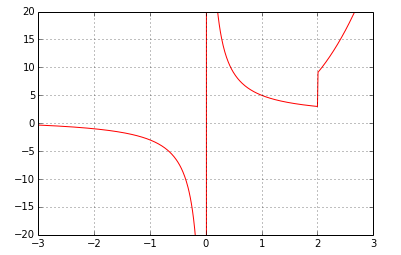

There is no fixed rule as to how a good approximation can be defined. It is recommended that you bracket or define the lower and upper search bounds before starting the root-finding iterative procedure. We certainly do not want to keep searching in the wrong direction endlessly for our root.

### Incremental search

A crude method of solving a nonlinear function is by doing an incremental search. Using an arbitrarily starting point $a$, we can obtain values of $f(a)$ for every increment of $dx$. We assume that the values of $F(a + dx), \ f(a + 2dx), \ f(a + 3dx)\cdots$ are going in the same direction as indicated by their sign. Once the sign changes, a solution is deemed as found. Otherwise, the iterative search terminates when it crosses the boundary point $b$.

A pictorial example of the root-finder method for iteration is given in the following graph:

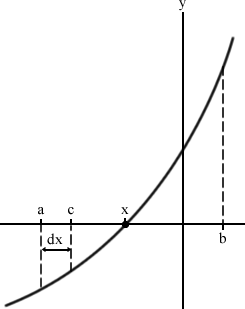

An example can be seen from the Python code:

In [1]:
''' Python code: Incremental search method '''
""" An incremental search algorithm """
import numpy as np

def incremental_search(f, a, b, dx): 
    """
    :param f: The function to solve
    :param a: The left boundary x-axis value
    :param b: The right boundary x-axis value
    :param dx: The incremental value in searching
    :return: The x-axis value of the root, number of iterations used
    """
    fa = f(a)
    c = a + dx
    fc = f(c)
    n = 1
    
    while np.sign(fa) == np.sign(fc):
        if a >= b:
            return a - dx, n
        
        a = c
        fa = fc
        c = a + dx
        fc = f(c)
        n += 1
    
    if fa == 0:
        return a, n
    elif fc == 0:
        return c, n
    else:
        return (a + c)/2., n

At every iterative procedure, $a$ will be replaced by $c$, and $c$ will be incremented by $dx$ before the next comparison. Should a root be found, it is plausible that it lies between $a$ and $c$, both inclusive. In the event should the solution not rest at either point, we will simply return the average of the two points as the best estimation. The variable $n$ keeps track of the number of iterations that underwent the process of finding our root.

We will use the equation that has an analytic solution of $y = x^3 + 2x^2 − 5$ to demonstrate and measure our root-finder, where $x$ is bounded between -5 and 5. A small $dx$ value of 0.001 is given, which also acts as a precision tool. Smaller values of $dx$ produce better precision but also require more search iterations:

In [2]:
""" The keyword 'lambda' creates an anonymous function with input argument x """
y = lambda x: x**3 + 2.0*x**2 - 5.

root, iterations = incremental_search (y, -5., 5., 0.001)

print ("Root is:", root)
print ("Iterations: ", iterations)

Root is: 1.2414999999999783
Iterations:  6242


The incremental search root-finder method is a basic demonstration of the fundamental behavior of a root-finding algorithm. The accuracy is at its best when defined by $dx$ and consumes an extremely long computational time in the worst possible scenario. The higher the accuracy demanded, the longer it takes for the solution to converge. For practical reasons, this method is the least preferred of all root-finding algorithms, and we will take a look at alternative methods to find the roots of our equation, which can give us a better performance.

### The bisection method

The bisection method is considered the simplest one-dimensional root-finding algorithm. The general interest is to find the value $x$ of a continuous function $f$ such that $f(x) = 0$.

Suppose we know the two points of an interval $a$ and $b$, where $a < b$, and that $f(a) < 0$ and $f(b) > 0$ lie along the continuous function, taking the midpoint of this interval as $c$, where $c = \frac{a + b}{2}$ the bisection method then evaluates this value as $f(c)$.

Let's illustrate the setup of points along a nonlinear function with the following graph:

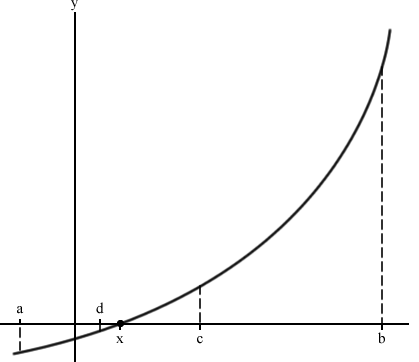

Since the value of $f(a)$ is negative and $f(b)$ is positive, the bisection method assumes that the root $x$ lies somewhere between $a$ and $b$ and gives $f(x) = 0$.

If $f(c) = 0$ or is very close to zero by some predetermined error tolerance value, then a root is declared as found. If $f(c) < 0$, then we may conclude that a root exists along the interval $c$ and $b$, or interval $a$ and $c$ otherwise.

On the next evaluation, $c$ is replaced as either $a$ or $b$ accordingly. With the new interval shortened, the bisection method repeats with the same evaluation to determine the next value of $c$ . This process continues, shrinking the width of the interval $ab$ until the root is determined as found.

The biggest advantage of using the bisection method is its guarantee to converge to an approximation of the root, given a predetermined error tolerance level and the maximum number of iterations allowed. It should be noted that the bisection method does not require knowledge of the derivative of the unknown function. In certain continuous functions, the derivative could be complex or even impossible to calculate. This makes the bisection method extremely valuable for working on functions that are not smooth.

Because the bisection method does not require derivative information from the continuous function, its major drawback is that it takes up more computational time in the iterative evaluation as compared to other root-finder methods. Also, since the search boundary of the bisection method lies in the intervals $a$ and $b$, it would require a good approximation to ensure that the root falls within this range. Otherwise, a wrong solution may be obtained or even none at all. Using large values of $a$ and $b$ might consume more computational time.

The bisection is considered to be stable without the use of an initial guess value for convergence to happen. Often, it is used in combination with other methods, such as the faster Newton's method, to converge quickly with precision.

Save this file as `bisection.py`. The Python code for the bisection method is given as follows:

In [3]:
""" The bisection method """

def bisection(f, a, b, tol=0.1, maxiter=10):
    """
    :param f: The function to solve
    :param a: The x-axis value where f(a)<0
    :param b: The x-axis value where f(b)>0
    :param tol: The precision of the solution
    :param maxiter: Maximum number of iterations
    :return: The x-axis value of the root, number of iterations used
    """
    c = (a+b)*0.5 # Declare c as the midpoint ab
    n = 1 # Start with 1 iteration
    while n <= maxiter:
        c = (a+b)*0.5
        if f(c) == 0 or abs(a-b)*0.5 < tol:
            # Root is found or is very close
            return c, n
        
        n += 1
        if f(c) < 0:
            a = c
        else:
            b = c
    return c, n

Let's try out our bisection method:

In [4]:
y = lambda x: x**3 + 2*x**2 - 5

root, iterations = bisection(y, -5, 5, 0.00001, 100)

print ("Root is:", root)

print ("Iterations: ", iterations)

Root is: 1.241903305053711
Iterations:  20


Again, we bounded the anonymous function lambda to the variable $y$ with an input parameter $x$ and attempted to solve the equation $y = x^3 + 2x^2 − 5$ as before in the interval between -5 to 5 to an accuracy of 0.00001 with a maximum iteration of 100.

As we can see, the result from the bisection method gives us better precision in far fewer iterations over the incremental search method.

### Newton's method

Newton's method, also known as the Newton-Raphson method, uses an iterative procedure to solve for a root using information about the derivative of a function. The derivative is treated as a linear problem to be solved. The first-order derivation $f'$ of the function $f$ represents the tangent line. The approximation to the next value of $x$, given as $x_1$, is as follows:

$$x_1 = x - \frac{f(x)}{f'(x)}$$

Here, the tangent line intersects the #x# axis at $x_1$, which produces $y = 0$. This also represents the first-order Taylor expansion about $x_1$ such that that the new point $x_1 = x + \Delta x$ solves the following equation:

$$f(x_1 + \Delta x) = 0$$

This process is repeated with $x$ taking the value of $x_1$ until the maximum number of iterations is reached, or the absolute difference between $x_1$ and $x$ is within an acceptable accuracy level.

An initial guess value is required to compute the values of $f(x)$ and $f'(x)$. The rate of convergence is quadratic, which is considered to be extremely fast in obtaining the solution with high levels of accuracy.

The drawback to Newton's method is that it does not guarantee global convergence to the solution. Such a situation arises when the function contains more than one root, or when the algorithm arrives at a local extremum and is unable to compute the next step. As this method requires knowledge of the derivative of its input function, it is required that the input function be differentiable. However, in certain circumstances, it is impossible for the derivative of a function to be known, or otherwise be mathematically easy to compute.

A graphical representation of Newton's method is shown in the following screenshot. $x0$ is the initial $x$ value. The derivative of $f(x0)$ is evaluated, which is a tangent line crossing the $x$ axis at $x1$. The iteration is repeated, evaluating the derivative at points $x1$, $x2$, $x3$, and so on.

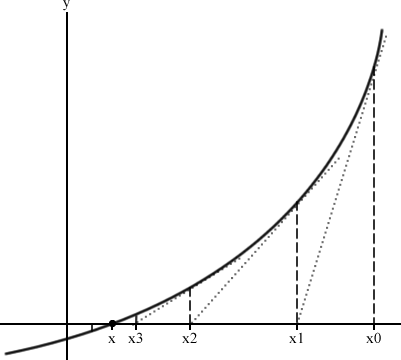

The implementation of Newton's method in Python is as follows:

In [5]:
""" The Newton-Raphson method """

def newton(f, df, x, tol=0.001, maxiter=100):
    """
    :param f: The function to solve
    :param df: The derivative function of f
    :param x: Initial guess value of x
    :param tol: The precision of the solution
    :param maxiter: Maximum number of iterations
    :return: The x-axis value of the root, number of iterations used
    """
    n = 1
    while n <= maxiter:
        x1 = x - f(x)/df(x)
        if abs(x1 - x) < tol: # Root is very close
            return x1, n
        else:
            x = x1
            n += 1
    return None, n

We will use the same function used in the bisection example and take a look at the results from Newton's method:

In [6]:
y = lambda x: x**3 + 2*x**2 - 5

dy = lambda x: 3*x**2 + 4*x

root, iterations = newton(y, dy, 5.0, 0.00001, 100)

print ("Root is:", root)
print ("Iterations:", iterations)

Root is: 1.241896563034502
Iterations: 7


Beware of division by zero exceptions! Using values such as 5.0, instead of 5, lets Python recognize the variable as a float, avoids the problem of treating variables as integers in calculations, and gives us better precision.

With Newton's method, we obtained a really close solution with less iteration over the bisection method.

### The secant method

The secant method uses secant lines to find the root. A secant line is a straight line that intersects two points of a curve. In the secant method, a line is drawn between two points on the continuous function such that it extends and intersects the $x$ axis. This method can be thought of as a Quasi-Newton method. By successively drawing such secant lines, the root of the function can be approximated.

The secant method is graphically represented in the following screenshot. An initial guess of the two $x$ axis values $a$ and $b$ is required to find $f(a)$ and $f(b)$. A secant line $y$ is drawn from $f(b)$ to $f(a)$ and intersects at point $c$ on the $x$ axis such that:

$$y = \frac{f(b) - f(a)}{b - a}(c - b) + f(b)$$

The solution to $c$ is therefore:

$$c = b - f(b)\frac{b - a}{f(b) - f(a)}$$

On the next iteration, $a$ and $b$ will take on the values of $b$ and $c$ respectively. The method repeats itself, drawing secant lines for the $x$ axis values of $a$ and $b$, $b$ and $c$, $c$ and $d$, and so on. The solution terminates when the maximum number of iterations has been reached or the difference between $b$ and $c$ has reached a prespecified tolerance level, as shown in the following graph:

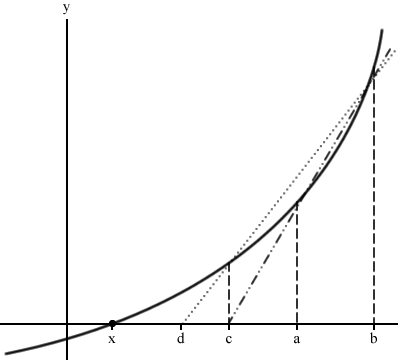

The rate of convergence of the secant method is considered to be superlinear. Its secant method converges much faster than the bisection method and slower than Newton's method. In Newton's method, the number of floating-point operations takes up twice as much time as the secant method in the computation of both its function and its derivative on every iteration. Since the secant method requires only computation of its function at every step, it can be considered faster in absolute time.

It is required that the initial guess values of the secant method be close to the root, otherwise it has no guarantee of converging to the solution.

The Python code for the secant method is given as follows:

In [7]:
""" The secant root-finding method """

def secant(f, a, b, tol=0.001, maxiter=100):
    """
    :param f: The function to solve
    :param a: Initial x-axis guess value
    :param b: Initial x-axis guess value, where b>a
    :param tol: The precision of the solution
    :param maxiter: Maximum number of iterations
    :return: The x-axis value of the root, number of iterations used
    """
    n = 1
    while n <= maxiter:
        c = b - f(b)*((b-a)/(f(b)-f(a)))
        if abs(c-b) < tol:
            return c, n
        
        a = b
        b = c
        n += 1
    
    return None, n

Again, we will reuse the same nonlinear function and return the results from the secant method:

In [8]:
y = lambda x: x**3 + 2*x**2 - 5

root, iterations = secant(y, -5.0, 5.0, 0.00001, 100)

print ("Root is:", root)
print ("Iterations:", iterations)

Root is: 1.2418965622558549
Iterations: 14


Though all of the preceding root-finding methods gave very close solutions, the secant method performs with fewer iterations compared to the bisection method, but with more than Newton's method.

### Combining root-finding methods

It is perfectly possible to write your own root-finding algorithms using a combination of the previously mentioned root-finding methods. For example, you may use the following implementation in the following order:

1. Use the faster secant method to converge the problem to a prespecified error tolerance value or a maximum number of iterations.
2. Once a prespecified tolerance level is reached, switch to using the bisection method to converge to the root by halving the search interval with each iteration until the root is found.

**Brent's method** or the **Wijngaarden-Dekker-Brent** method combines the bisection root-finding method, secant method, and inverse quadratic interpolation. The algorithm attempts to use either the secant method or inverse quadratic interpolation whenever possible, and uses the bisection method where necessary.

Brent's method can also be found in the `scipy.optimize.brentq` function of SciPy.

### SciPy implementations

Before starting on writing your root-finding algorithm to solve nonlinear or even linear problems, take a look at the documentation of the `scipy.optimize` methods. SciPy contains a collection of scientific computing functions as an extension of Python. Chances are that these open source algorithms might fit into your applications off-the-shelf.

### Root-finding scalar functions

Some root-finding functions that can be found in the `scipy.optimize` modules are `bisect`, `newton`, `brentq`, and `ridder`. Let's set up the examples that we have discussed using the implementations by SciPy:

In [9]:
""" Documentation at http://docs.scipy.org/doc/scipy/reference/optimize.html """

import scipy.optimize as optimize

y = lambda x: x**3 + 2.*x**2 - 5.
dy = lambda x: 3.*x**2 + 4.*x

# Call method: bisect(f, a, b[, args, xtol, rtol, maxiter, ...])

print ("Bisection method: %s" % optimize.bisect(y, -5., 5., xtol=0.00001))

# Call method: newton(func, x0[, fprime, args, tol, ...])
print ("Newton's method: %s" % optimize.newton(y, 5., fprime=dy))

# When fprime=None, then the secant method is used.
print ("Secant method: %s" % optimize.newton(y, 5.))

# Call method: brentq(f, a, b[, args, xtol, rtol, maxiter, ...])
print ("Brent's method: %s" % optimize.brentq(y, -5., 5.))

Bisection method: 1.241903305053711
Newton's method: 1.2418965630344798
Secant method: 1.2418965630344803
Brent's method: 1.241896563034559


When we run the preceding code, the following output is generated:

    Bisection method: 1.24190330505
    Newton's method: 1.24189656303
    Secant method: 1.24189656303
    Brent's method: 1.24189656303

We can see that the SciPy implementation gives us somewhat very close answers as our derived ones.

It should be noted that SciPy has a set of well-defined conditions for every implementation. For example, the function call of the bisection routine is given as follows:

    scipy.optimize.bisect(f, a, b, args=(), xtol=1e-12, rtol=4.4408920985006262e-16, maxiter=100, full_output=False, 
    disp=True)

The function will strictly evaluate the function $f$ to return a zero of the function. $f(a)$ and $f(b)$ cannot have the same signs. In certain scenarios, it is difficult to fulfill these constraints. For example, in solving for nonlinear implied volatility models, volatility values cannot be negative. In active markets, finding a root or a zero of the volatility function is almost impossible without modifying the underlying implementation. In such cases, implementing our own root-finding methods might perhaps give us more authority over how our application should behave.

### General nonlinear solvers

The `scipy.optimize` module also contains multidimensional general solvers that we can harness to our advantage. The `root` and `fsolve` functions are some examples with the following function properties:

- `root(fun, x0[, args, method, jac, tol, ...])`: This finds a root of a vector function
- `fsolve(func, x0[, args, fprime, ...])`: This finds the roots of a function

The outputs are returned as a dictionary object. Using our example again as inputs to these functions, we will get the following output:

In [12]:
import scipy.optimize as optimize

y = lambda x: x**3 + 2.*x**2 - 5.
dy = lambda x: 3.*x**2 + 4.*x

print (optimize.fsolve(y, 5., fprime=dy))
print (optimize.root(y, 5.))

[ 1.24189656]
    fjac: array([[-1.]])
     fun: array([  3.55271368e-15])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([ -3.73605502e-09])
       r: array([-9.59451815])
  status: 1
 success: True
       x: array([ 1.24189656])


Using an initial guess value of 5, our solution converged to the root at 1.24189656, which is pretty close to the answers we had so far. What happens when we choose a value on the other side of the graph? Let's use an initial guess value of -5:

In [13]:
print (optimize.fsolve(y, -5., fprime=dy))
print (optimize.root(y, -5.))

[-1.33306553]
    fjac: array([[-1.]])
     fun: array([-3.81481496])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 28
     qtf: array([ 3.81481521])
       r: array([-0.00461503])
  status: 5
 success: False
       x: array([-1.33306551])


C:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


As seen from the display output, the algorithms did not converge and return a root that is a little further away from our previous answers. If we take a look at the equation on a graph, there are a number of points along the curve that lie very close to the root. A root-finder would be needed to obtain the desired level of accuracy, while solvers attempt to solve for the nearest answer in the fastest time.

### Summary

In this chapter, we briefly discussed the persistence of nonlinearity in economics and finance. We looked at some nonlinear models that are commonly used in finance to explain certain aspects of data left unexplained by linear models: the Black-Scholes implied volatility model, Markov switching model, threshold model, and smooth transition models.

In Black-Scholes implied volatility modeling, we discussed the volatility smile that was made up of implied volatilities derived via the Black-Scholes model from the market prices of call or put options for a particular maturity. You may be interested enough to seek the lowest implied volatility value possible, which can be useful for inferring theoretical prices and comparing against the market prices for potential opportunities. However, since the curve is nonlinear, linear algebra cannot adequately solve for the optimal point. To do so, we will require the use of rootfinding methods.

Root-finding methods attempt to find the root of a function or its zero. We discussed common root-finding methods: the bisection method, Newton's method, and secant method. Using a combination of root-finding algorithms may help us to seek roots of complex functions faster. One such example is Brent's method.

We explored functionalities in the `scipy.optimize` module that contains these root-finding methods, albeit with constraints. One of these constraints requires that the two boundary input values be evaluated with a pair of a negative value and positive value for the solution to converge successfully. In implied volatility modeling, this evaluation is almost impossible since volatilities do not have negative values. Implementing our own root-finding methods might perhaps give us more authority over how our application should perform.

Using general solvers is another way of finding roots. They may also converge to our solution more quickly, but such a convergence is not guaranteed by the initial given values.

Nonlinear modeling and optimization are inherently a complex task, and there is no universal solution or a sure way to reach a conclusion. This chapter serves to introduce nonlinearity studies for finance in general.

In the next chapter, we will take a look at numerical methods commonly used for options pricing. By pairing a numerical procedure with a root-finding algorithm, we will learn how to build an implied volatility model with the market prices of an equity option.